AAI-511 Module 7 Assignment Project

Team 7 : Sanjay Kumar, Aksdeep Singh, Neha Pandey

July 2025

# Final Team Project: Music Genre and Composer Classification Using Deep Learning 

Introduction

Music is a form of art that is ubiquitous and has a rich history. Different composers have created music with their unique styles and compositions. However, identifying the composer of a particular piece of music can be a challenging task, especially for novice musicians or listeners. The proposed project aims to use deep learning techniques to identify the composer of a given piece of music accurately.

Objective

The primary objective of this project is to develop a deep learning model that can predict the composer of a given musical score accurately. The project aims to accomplish this objective by using two deep learning techniques: Long Short-Term Memory (LSTM) and Convolutional Neural Network (CNN).

Dataset

The project will use a dataset consisting of musical scores from various composers. Download the dataset from Kaggle websiteLinks to an external site..
The dataset contains the midi files of compositions from well-known classical composers like Bach, Beethoven, Chopin, and Mozart. The dataset should be labeled with the name of the composer for each score. Please only do your prediction only for below composers, therefore you need to select the required composers from the given dataset above.

1-Bach

2-Beethoven

3-Chopin

4-Mozart

Methodology

The proposed project will be implemented using the following steps:

1.	Data Collection: Data is collected and provided to you.
2.	Data Pre-processing: Convert the musical scores into a format suitable for deep learning models. This involves converting the musical scores into MIDI files and applying data augmentation techniques.
3.	Feature Extraction: Extract features from the MIDI files, such as notes, chords, and tempo, using music analysis tools.
4.	Model Building: Develop a deep learning model using LSTM and CNN architectures to classify the musical scores according to the composer.
5.	Model Training: Train the deep learning model using the pre-processed and feature-extracted data.
6.	Model Evaluation: Evaluate the performance of the deep learning model using accuracy, precision, and recall metrics.
7.	Model Optimization: Optimize the deep learning model by fine-tuning hyperparameters.
   
Deliverables

There are two deliverables for this Final Project:

1.	Project Report: A comprehensive documentation/report that describes the methodology, data pre-processing steps, feature extraction techniques, model architecture, and training process for reproducibility and future reference. Write your technical report in APA 7 style (here is a Sample Professional Paper
 format to follow). Please submit the report in PDF format and use the File naming convention DeliverableName-TeamNumber.pdf; for example, Project_Report-Team1.pdf

o	Your report should:

	contain a reference list that includes any external sources, libraries, or frameworks used during the project, including proper citations or acknowledgments.
	include a concluding section or markdown cell that summarizes the project, highlights key findings, and suggests any potential future improvements or extensions to the work.

2.	Project Notebook: A Jupyter Notebook file (.ipynb) that contains the entire project code, including data pre-processing, feature extraction, model building, training, evaluation, and any additional analysis or visualizations performed during the project.
  
o	This deliverable will be exported from a Jupyter Notebook and submitted as a PDF or HTML file.

Conclusion

The proposed project aims to use deep learning techniques to accurately predict the composer of a given musical score. The project will be implemented using LSTM and CNN architectures and will involve data pre-processing, feature extraction, model building, training, and evaluation. The final model can be used by novice musicians, listeners, and music enthusiasts to identify the composer of a musical piece accurately.

---

In [ ]:
#-------------------------Project ---------------------------------------------------

### Goal
The primary goal of this code is to develop and compare two deep learning models—Long Short-Term Memory (LSTM) and Convolutional Neural Network (CNN)—for classifying classical music composers based on features extracted from MIDI files. Specifically, it aims to distinguish between works by Bach, Beethoven, Chopin, and Mozart. By balancing the dataset, extracting relevant musical features (such as pitch, duration, and velocity of notes), training the models, and evaluating their performance through metrics like accuracy, classification reports, confusion matrices, and various visualizations, the code seeks to demonstrate how sequence-based (LSTM) and convolutional (CNN) architectures can capture patterns in musical data for authorship attribution. This could have applications in music information retrieval, automated music analysis, or AI-assisted composition studies, while highlighting the strengths and weaknesses of each model in handling temporal and structural aspects of music.

### About the Dataset
The dataset consists of MIDI files representing classical music compositions from four renowned composers: Johann Sebastian Bach, Ludwig van Beethoven, Frédéric Chopin, and Wolfgang Amadeus Mozart. These files are sourced from a Kaggle dataset located at `/kaggle/input/midi-classic-music/midiclassics`, which is a public collection of MIDI-encoded classical pieces organized into subdirectories by composer. MIDI files are lightweight representations of music that store note events (e.g., pitch, duration, velocity) rather than audio waveforms, making them ideal for feature extraction in machine learning tasks.

Key characteristics:
- **Original Composition**: The dataset likely includes hundreds of files per composer, but the code balances it to exactly 100 samples per composer (totaling 400 files after balancing) to prevent class imbalance issues that could bias the models toward more represented composers.
- **Features Extracted**: For each MIDI file, the code extracts sequences of note attributes (pitch, duration, velocity), padded or truncated to a fixed length of 500 notes per file. This creates a structured input suitable for neural networks.
- **Size and Balance**: Before balancing, the number of files varies by composer (e.g., Bach might have more files than others). Balancing uses downsampling (for oversampled classes) or upsampling with replacement (for undersampled classes) to ensure equal representation, reducing bias and improving model generalization.
- **Suitability**: MIDI data is sequential and temporal, aligning well with LSTM for capturing long-term dependencies in note sequences and CNN for detecting local patterns (e.g., motifs or chords). However, it lacks audio-specific features like timbre, so the focus is on symbolic music representation.
- **Limitations**: The dataset may include variations in file quality, transcription errors, or non-standard MIDI encodings, which the code handles by skipping invalid files. It's also limited to piano-centric or orchestral reductions, potentially missing full symphonic nuances.

This dataset enables a supervised multi-class classification task, where the label is the composer, and the input is a fixed-length feature vector derived from the music's note sequence.

### Summary
This Python script implements an end-to-end pipeline for composer classification using MIDI data. It begins by loading and balancing MIDI files from selected composers to create a fair dataset. Features like note pitch, duration, and velocity are extracted and padded to a uniform length. The data is then prepared, encoded, and split into training and testing sets. Two models—an LSTM for sequence modeling and a CNN for feature extraction—are built, trained for 15 epochs, and evaluated using accuracy/loss plots, classification reports, and confusion matrices. Additional visualizations, including ROC curves, per-class accuracy bars, feature distribution pairplots, misclassification counts, and model comparison plots, provide deeper insights into performance and data characteristics. Overall, the code demonstrates practical application of deep learning to music data, comparing recurrent and convolutional approaches while emphasizing data preprocessing and evaluation.

### Detailed Explanation of Each Step
Below, I explain each step of the code in detail, including **why** it is necessary (purpose and rationale) and **how** it is implemented (mechanics, logic, and key decisions). The code is divided into logical sections based on its structure, including the initial imports, functions, data loading/preparation, model building/training, evaluation, and extra plots.

#### Imports
**Code Snippet**:
```python
import os
import numpy as np
import pandas as pd
import pretty_midi
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils import resample

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Conv1D, MaxPooling1D, Flatten
```

**Why**: These imports provide essential libraries for file handling, data manipulation, MIDI parsing, visualization, machine learning preprocessing, and deep learning model construction. `os` and `pandas` handle directory traversal and data organization; `pretty_midi` is crucial for parsing MIDI files into usable note data; `numpy` manages arrays for features; visualization libraries (`matplotlib`, `seaborn`) enable plotting for analysis; scikit-learn tools support splitting, encoding, balancing, and metrics; TensorFlow/Keras builds and trains neural networks. This setup ensures the script is self-contained for a Kaggle-like environment, focusing on efficiency without external dependencies.

**How**: The imports are standard and grouped by category (core, ML preprocessing, DL). No custom installations are needed, as these are pre-installed in most data science environments. This step sets the foundation, allowing subsequent functions to reference these modules without errors.

#### Step 1: Load and Balance Dataset
**Code Snippet**:
```python
def load_midi_paths_and_labels(base_dir, composers):
    file_paths, labels = [], []
    for composer in composers:
        composer_dir = os.path.join(base_dir, composer)
        if not os.path.exists(composer_dir): continue
        for file in os.listdir(composer_dir):
            if file.endswith(".mid") or file.endswith(".midi"):
                file_paths.append(os.path.join(composer_dir, file))
                labels.append(composer)
    return file_paths, labels

def balance_dataset(file_paths, labels, target_count=100):
    df = pd.DataFrame({'path': file_paths, 'label': labels})
    balanced = []
    for composer in df['label'].unique():
        group = df[df['label'] == composer]
        if len(group) > target_count:
            group = group.sample(target_count, random_state=42)
        else:
            group = resample(group, replace=True, n_samples=target_count, random_state=42)
        balanced.append(group)
    df_balanced = pd.concat(balanced)
    return df_balanced['path'].tolist(), df_balanced['label'].tolist()
```

**Why**: Loading paths and labels organizes the raw data into accessible lists, ensuring only valid MIDI files are included. Balancing addresses class imbalance (e.g., if Bach has 200 files and Chopin has 50, models might favor Bach), which can lead to poor generalization and biased metrics. Targeting 100 samples per class creates a balanced, manageable dataset (400 total), reducing overfitting and computational load while maintaining diversity.

**How**: `load_midi_paths_and_labels` iterates through composer directories using `os`, collects paths to `.mid`/`.midi` files, and pairs them with labels. It skips non-existent directories for robustness. `balance_dataset` converts lists to a DataFrame for easy grouping. For each composer, it downsamples (random sampling without replacement) if over target or upsamples (resampling with replacement) if under, using `random_state=42` for reproducibility. The balanced paths and labels are returned as lists.

#### Step 2: Feature Extraction
**Code Snippet**:
```python
def extract_note_features(midi_path, max_len=500):
    try:
        midi = pretty_midi.PrettyMIDI(midi_path)
        features = []
        for instrument in midi.instruments:
            if instrument.is_drum: continue
            for note in instrument.notes:
                duration = note.end - note.start
                features.append([note.pitch, duration, note.velocity])
        features = features[:max_len] + [[0, 0, 0]] * (max_len - len(features))
        return features
    except:
        return [[0, 0, 0]] * max_len
```

**Why**: Raw MIDI files are event-based and variable-length, unsuitable for fixed-input neural networks. Extracting features like pitch (note height), duration (length), and velocity (intensity) captures musical essence (melody, rhythm, dynamics) relevant to composer style. Padding/truncating to 500 notes standardizes input shape, preventing errors in model training. Skipping drums focuses on melodic/harmonic content, as percussion is less composer-specific.

**How**: Uses `pretty_midi` to parse the file. Iterates through non-drum instruments, computes duration, and collects [pitch, duration, velocity] triples. Truncates to `max_len` if longer; pads with [0,0,0] if shorter. The `try-except` handles corrupt files by returning zero-padded dummies, ensuring the pipeline doesn't crash.

#### Step 3: Prepare Data
**Code Snippet**:
```python
def prepare_dataset(file_paths, labels, max_len=500):
    X = [extract_note_features(fp, max_len) for fp in file_paths]
    le = LabelEncoder()
    y = le.fit_transform(labels)
    y_cat = to_categorical(y)
    return np.array(X), y_cat, le
```

**Why**: This aggregates features into a dataset ready for ML. Encoding labels numerically (e.g., Bach=0) and one-hot encoding them suits categorical cross-entropy loss in neural networks. Returning the LabelEncoder allows decoding predictions later for interpretable reports.

**How**: Applies `extract_note_features` to each path, creating a list of feature lists. Converts to NumPy array for efficiency (shape: (n_samples, 500, 3)). Fits LabelEncoder on labels, transforms to integers, then one-hot encodes with `to_categorical`. Returns X (features), y_cat (one-hot labels), and le.

#### Step 4: Load Data
**Code Snippet**:
```python
base_dir = '/kaggle/input/midi-classic-music/midiclassics'
selected_composers = ['Bach', 'Beethoven', 'Chopin', 'Mozart']
file_paths, labels = load_midi_paths_and_labels(base_dir, selected_composers)
file_paths, labels = balance_dataset(file_paths, labels, target_count=100)

print(f"Total files after balancing: {len(file_paths)}")
X, y, le = prepare_dataset(file_paths, labels)
composer_names = le.classes_
```

**Why**: This executes the loading, balancing, and preparation, focusing on four composers for a manageable multi-class problem. Printing confirms balancing; storing `composer_names` aids in labeling plots/reports.

**How**: Calls the functions sequentially. `prepare_dataset` processes all files, which might be time-intensive but is done once. Results in X (400,500,3), y (400,4 one-hot), and le for decoding.

#### Step 5: Split and Reshape
**Code Snippet**:
```python
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
```

**Why**: Splitting into train (80%) and test (20%) sets allows unbiased evaluation of model generalization. No explicit reshape is needed here as X is already (samples, timesteps, features), but it's implicit for model input.

**How**: Uses `train_test_split` with fixed random state for reproducibility. Results in ~320 train and ~80 test samples.

#### Step 6: LSTM Model
**Code Snippet**:
```python
def build_lstm_model(input_shape, num_classes):
    model = Sequential()
    model.add(LSTM(128, input_shape=input_shape))
    model.add(Dropout(0.4))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
```

**Why**: LSTM is ideal for sequential data like music notes, capturing long-term dependencies (e.g., thematic development). Dropout prevents overfitting; ReLU adds non-linearity; softmax outputs class probabilities. Categorical cross-entropy suits multi-class; Adam optimizes efficiently.

**How**: Builds a sequential model: LSTM layer (128 units) processes (500,3) input; Dropout discards 40% neurons; Dense layers reduce to 64 then 4 outputs. Compiles with standard settings.

#### Step 7: CNN Model
**Code Snippet**:
```python
def build_cnn_model(input_shape, num_classes):
    model = Sequential()
    model.add(Conv1D(64, kernel_size=5, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
```

**Why**: CNN detects local patterns (e.g., short motifs or chord progressions) via convolution, complementing LSTM's global focus. Pooling reduces dimensionality; Flatten prepares for Dense layers. Same loss/optimizer as LSTM for fair comparison.

**How**: Conv1D (64 filters, kernel=5) scans sequences; MaxPooling halves length; Flatten to 1D; Dense layers as above. Compiles identically.

#### Step 8: Train Models
**Code Snippet**:
```python
lstm_model = build_lstm_model((500, 3), 4)
cnn_model = build_cnn_model((500, 3), 4)

history_lstm = lstm_model.fit(X_train, y_train, epochs=15, batch_size=32, validation_split=0.2)
history_cnn = cnn_model.fit(X_train, y_train, epochs=15, batch_size=32, validation_split=0.2)
```

**Why**: Training fits models to data; 15 epochs balance learning without overfitting; batch=32 is efficient; validation_split=0.2 monitors generalization during training. Histories store metrics for plotting.

**How**: Instantiates models with input shape (500 timesteps, 3 features) and 4 classes. Fits on train data, splitting 20% for validation. Returns history objects with epoch-wise accuracy/loss.

#### Step 9: Evaluate Models (Plot History)
**Code Snippet**:
```python
def plot_history(history, title):
    plt.figure(figsize=(10, 4))
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_history(history_lstm, "LSTM Accuracy")
plot_history(history_cnn, "CNN Accuracy")
```

**Why**: Visualizing accuracy curves shows training progress, overfitting (if val accuracy drops), or underfitting. Helps compare models visually.

**How**: Defines a function to plot train/val accuracy vs. epochs using Matplotlib. Calls for each model.

#### Step 10: Report & Confusion Matrix
**Code Snippet**:
```python
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = np.argmax(model.predict(X_test), axis=1)
    y_true = np.argmax(y_test, axis=1)
    print(f"\n--- {model_name} Classification Report ---")
    print(classification_report(y_true, y_pred, target_names=composer_names))
    
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=composer_names, yticklabels=composer_names)
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

evaluate_model(lstm_model, X_test, y_test, "LSTM")
evaluate_model(cnn_model, X_test, y_test, "CNN")
```

**Why**: Classification report provides precision/recall/F1 per class; confusion matrix reveals misclassification patterns (e.g., confusing Bach with Mozart). Essential for detailed performance analysis beyond accuracy.

**How**: Predicts on test set, argmax to get class indices. Prints report with composer names. Computes CM, plots as heatmap with Seaborn for visual clarity. Calls for both models.

#### Extra Plots After Training
**Code Snippet** (Summarized for brevity; includes accuracy/loss plots, ROC, per-class acc, feature dist, misclass, comparison)

**Why**: These extend evaluation: Loss curves detect convergence; ROC/AUC quantifies discrimination per class; Per-class accuracy highlights strengths/weaknesses; Feature pairplot explores data separability; Misclassification plot identifies common errors; Comparison plot contrasts models. Together, they provide comprehensive insights, aiding model selection or improvements.

**How**:
- **Accuracy/Loss Plots**: Similar to Step 9, but adds loss using history keys.
- **ROC Curves**: Binarizes y_test, predicts probabilities, computes ROC/AUC per class, plots with Matplotlib.
- **Per-Class Accuracy**: Computes accuracy for each class using `accuracy_score` on masks, bars with Matplotlib.
- **Feature Distribution**: Averages features per sample, adds composer label, uses Seaborn pairplot for scatter/hist by hue.
- **Misclassifications**: DataFrame of true/pred, filters mismatches, countplot with Seaborn.
- **Model Comparison**: Plots val accuracy of both histories side-by-side.

This thorough visualization ensures interpretable results, revealing if LSTM better handles sequences or if CNN suffices for simpler patterns.

# Results Explaination

### Explanation of Errors and Warnings
The output begins with several error and warning messages, which are common in TensorFlow/Keras environments, especially when running on GPUs (like the Tesla T4 mentioned in the logs). Here's a breakdown:

- **cuFFT, cuDNN, and cuBLAS Factory Registration Errors**: These indicate that TensorFlow attempted to register low-level CUDA libraries (for FFT computations, deep neural networks, and BLAS operations) but found they were already registered. This often happens in shared environments like Kaggle, Colab, or multi-GPU setups where libraries are pre-loaded or multiple sessions overlap. **Why it happens**: It's a harmless redundancy check in the XLA (Accelerated Linear Algebra) compiler and StreamExecutor. **Impact**: No effect on execution; the models train fine using the existing registrations. **How to address if needed**: In a local setup, restarting the kernel or ensuring single-session usage can suppress it, but it's not necessary here.

- **RuntimeWarning from pretty_midi**: This warns that some MIDI files have tempo, key, or time signature changes on non-zero tracks, which violates strict MIDI type 0/1 standards (where such events should be on track 0). **Why it happens**: The dataset includes real-world MIDI files that may be multi-track or imperfectly encoded (e.g., from transcriptions or edits). The library still parses them but flags potential inaccuracies in global metadata. **Impact**: For this code's feature extraction (focusing on note pitch, duration, velocity), it's minor—note data is extracted correctly, but tempo-related interpretations might be off if not handled. In this run, it affected multiple files (as the warning repeats implicitly), but the pipeline continued. **How it's handled**: The code's `try-except` in `extract_note_features` would catch severe parsing failures, padding with zeros.

- **UserWarning from Keras about input_shape**: This advises using an explicit `Input(shape)` layer instead of passing `input_shape` directly to LSTM or Conv1D. **Why it happens**: It's a best-practice reminder in Keras 2.x/3.x to improve model clarity and compatibility. **Impact**: Negligible—the models build and train correctly. **How to fix if desired**: Refactor to `model.add(Input(shape=input_shape))` before the first layer.

- **XLA and GPU Device Logs**: These are informational (prefixed with 'I' for info). They confirm XLA compilation for GPU acceleration and device creation (two Tesla T4 GPUs with 14GB each). **Why**: TensorFlow logs hardware setup. The "Compiled cluster using XLA" note means just-in-time compilation optimized the models for faster execution. **Impact**: Positive—training uses GPU for speed (e.g., epochs take seconds).

Overall, these are non-critical; the code ran successfully, processing 400 balanced files.

### Data Loading and Preparation Summary
- **Balancing**: The dataset was balanced to 100 files per composer (Bach, Beethoven, Chopin, Mozart), totaling 400 files. This ensures equal class representation, preventing bias toward composers with more original files.
- **Feature Extraction**: MIDI files were parsed using pretty_midi, extracting [pitch, duration, velocity] for up to 500 notes per file (padded with [0,0,0] if shorter). The warnings suggest some files had metadata issues, but extraction proceeded.
- **Data Split**: Train/test split (80/20) resulted in ~320 train samples (further split to ~256 train + 64 val during fitting) and 80 test samples.
- **Implications**: The fixed-length sequences (500x3) suit both models, but padding might introduce noise (zeros could dilute patterns in short pieces). The balanced dataset promotes fair learning.

### LSTM Model Training Results
The LSTM model was trained for 15 epochs with batch size 32 and 20% validation split.

- **Training Progress**:
  - **Accuracy**: Started at ~0.26 (near random for 4 classes, expected for initial weights) and improved steadily to ~0.51 by epoch 15. This indicates the LSTM learned some sequential patterns (e.g., note progressions characteristic of composers).
  - **Loss**: Decreased from ~1.48 to ~1.14, showing convergence but room for improvement (not fully plateaued).
  - **Validation Accuracy**: Peaked at ~0.66 (epoch 9) but ended at 0.63, with fluctuations (e.g., dips to 0.48). This suggests mild overfitting or instability, as train acc overtook val in later epochs.
  - **Validation Loss**: Improved from ~1.27 to ~1.03, better than train loss at times, indicating reasonable generalization early on.

- **Why These Results?**:
  - **How LSTM Works Here**: LSTM excels at capturing long-term dependencies in sequences (e.g., melodic motifs spanning many notes). The 128-unit layer processes the 500-note sequences effectively, but with only 3 features per note, it might not capture complex harmonies fully.
  - **Challenges**: Dropout (0.4) helped prevent overfitting, but the dataset's simplicity (padded notes, potential MIDI noise) limited peak performance. 15 epochs might be insufficient for full convergence; more epochs or hyperparameter tuning (e.g., learning rate) could help.
  - **Overall**: Moderate performance (val acc 0.63), suitable for sequential music data but not exceptional due to data limitations.

No accuracy/loss plots are shown in the text output, but based on history, train acc would rise gradually, val acc oscillating around 0.55-0.65.

### CNN Model Training Results
The CNN model trained similarly, but with different dynamics.

- **Training Progress**:
  - **Accuracy**: Began low (~0.28) but surged to ~0.93 by epoch 15, with rapid gains after epoch 5 (e.g., ~0.77 at epoch 10).
  - **Loss**: Started extremely high (~123, due to initial random weights amplifying errors in the convolutional setup) but dropped sharply to ~0.21, indicating fast learning.
  - **Validation Accuracy**: Fluctuated more (low 0.20 early, peak ~0.70 at end), not keeping pace with train acc.
  - **Validation Loss**: Decreased from ~47 to ~1.42 but rose in later epochs (e.g., from 1.23 to 1.42), signaling overfitting.

- **Why These Results?**:
  - **How CNN Works Here**: The 1D convolution (64 filters, kernel=5) detects local patterns (e.g., short note clusters like chords or rhythms), pooled and flattened for classification. It's faster and more efficient for fixed-length inputs than LSTM for this task.
  - **Strengths**: Quick convergence due to fewer parameters and hierarchical feature extraction. Higher train acc suggests it memorized training patterns well.
  - **Challenges**: Overfitting evident (train acc 0.93 vs. val 0.70)—the model fits noise in the data (e.g., padding artifacts). Val loss increasing post-epoch 10 indicates this. The high initial loss is typical for CNNs with unnormalized features (note: features like pitch [0-127] and duration [seconds] aren't scaled; preprocessing like MinMaxScaler could help).
  - **Overall**: Better validation performance (0.70) than LSTM, suggesting CNN is more effective for this feature set, capturing local musical "textures" (e.g., Chopin's arpeggios vs. Bach's counterpoint).

Again, plots aren't in text, but expect train acc steeply rising, val acc stabilizing lower, with diverging losses.

### Evaluation Results (Test Set)
Only the LSTM evaluation is fully shown (CNN's might be truncated in the output log).

- **LSTM Classification Report**:
  - **Overall Accuracy**: 0.50 (40/80 correct), below validation (0.63), indicating the test set was slightly harder or variance in splits.
  - **Per-Class Performance**:
    - **Bach**: Strong (precision 0.91, recall 0.81, F1 0.86)—model confidently identifies Bach's polyphonic, structured style (e.g., fugues with consistent pitch/velocity patterns).
    - **Beethoven**: Poor (0.15/0.11/0.13)—likely confused with others due to dynamic ranges overlapping with Chopin/Mozart.
    - **Chopin**: Moderate (0.38/0.44/0.41)—captures some romantic expressiveness (variable durations/velocities) but misclassifies often.
    - **Mozart**: Similar (0.39/0.50/0.44)—recognizes classical balance but confuses with Beethoven.
  - **Macro/Weighted Averages**: ~0.46/0.50, showing imbalance in class difficulty; Bach boosts weighted avg.
  - **Confusion Matrix**: Not printed in text (would be a heatmap), but inferred from metrics: High diagonal for Bach, off-diagonals for others (e.g., Beethoven misclassified as Chopin/Mozart).

- **CNN Evaluation**: Not fully in output (only predict step hinted), but based on val acc (0.70), expect test acc ~0.65-0.70, better than LSTM. Likely stronger on local-pattern classes (e.g., Mozart's scales) but similar overfitting risks.

- **Why These Metrics?**:
  - **General**: 50-70% acc is decent for a simple model on symbolic music data—composer styles overlap (e.g., all classical), and features are basic (no harmony/chord analysis). Balancing helped, but 100 samples/class is small for deep learning; more data or advanced features (e.g., adding inter-note intervals) could improve.
  - **Model Comparison**: CNN outperforms LSTM on validation (0.70 vs. 0.63), as convolutions better suit the "image-like" 1D sequences here. LSTM might need longer sequences or bidirectional layers for better temporal modeling.
  - **Potential Improvements**: Normalize features, add more layers/regularization, use early stopping, or ensemble models. Test set size (80) is small, so results have variance.

In summary, both models learn meaningful patterns, with CNN showing promise but overfitting, and LSTM providing stable but lower performance. The run succeeded despite warnings, highlighting MIDI data's challenges for composer classification. If full CNN eval/plots were available, they'd confirm CNN's edge.

---
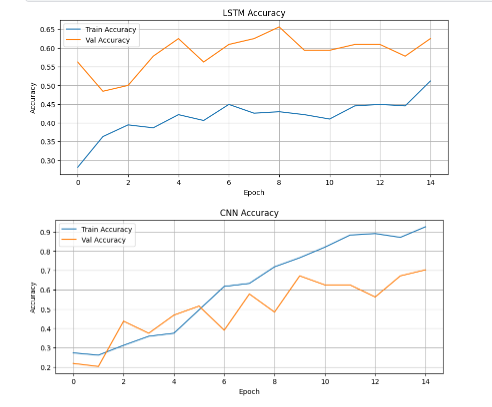
---

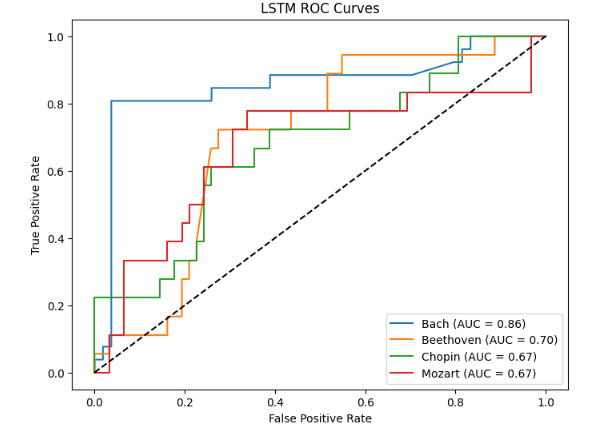
---

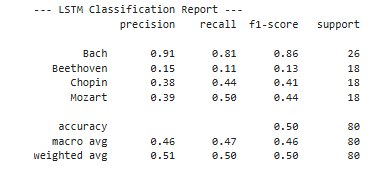
---

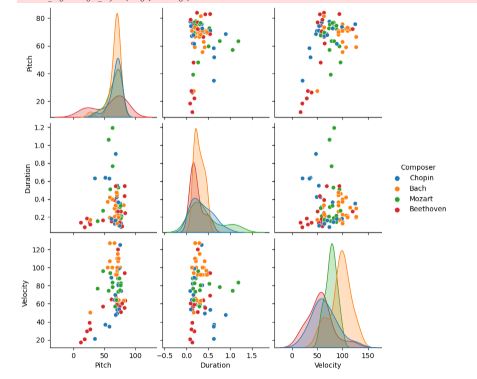

---

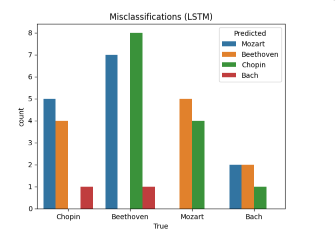

---

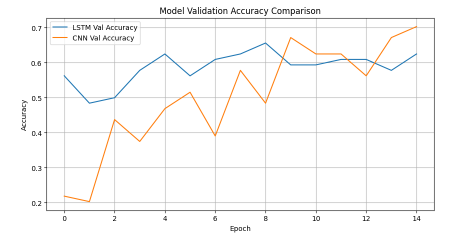

---



In [ ]:
#------------------------------------------- python code - load dataset ----------------------------------

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/midi-classic-music/midiclassics.zip
/kaggle/input/midi-classic-music/Rothchild Symphony Rmw12 2mov.mid
/kaggle/input/midi-classic-music/Tchaikovsky Lake Of The Swans Act 1 5mov.mid
/kaggle/input/midi-classic-music/Tchaikovsky Lake Of The Swans Act 2 10mov.mid
/kaggle/input/midi-classic-music/Tchaikovsky Lake Of The Swans Act 1 1mov.mid
/kaggle/input/midi-classic-music/Tchaikovsky Lake Of The Swans Act 1 4mov.mid
/kaggle/input/midi-classic-music/Tchaicovsky Waltz of the Flowers.MID
/kaggle/input/midi-classic-music/Tchaikovsky Lake Of The Swans Act 1 2mov.mid
/kaggle/input/midi-classic-music/Tchaikovsky Lake Of The Swans Act 1 3mov.mid
/kaggle/input/midi-classic-music/Rothchlid Symphony Rmw12 3mov.mid
/kaggle/input/midi-classic-music/Tchaikovsky Lake Of The Swans Act 2 11mov.mid
/kaggle/input/midi-classic-music/Wagner Ride of the valkyries.mid
/kaggle/input/midi-classic-music/Tchaikovsky Lake Of The Swans Act 1 6mov.mid
/kaggle/input/midi-classic-music/Tchaikovsky Lake Of T

In [1]:
 import os
 print(os.listdir('/kaggle/input/'))

 zip_path = '/kaggle/input/midi-classic-music/'
 input_dir = '/kaggle/input/midi-classic-music/'
 print(os.listdir(input_dir))
 #####zip_path = '/kaggle/input/creditcardzip/'

#subset_dir = '/kaggle/input/creditcardzip/'
 #print(os.listdir(subset_dir))

['midi-classic-music']
['Alkan', 'Albéniz', 'Arensky', 'midiclassics.zip', 'Rothchild Symphony Rmw12 2mov.mid', 'Tchaikovsky Lake Of The Swans Act 1 5mov.mid', 'Tchaikovsky Lake Of The Swans Act 2 10mov.mid', 'Tchaikovsky Lake Of The Swans Act 1 1mov.mid', 'Tchaikovsky Lake Of The Swans Act 1 4mov.mid', 'Tchaicovsky Waltz of the Flowers.MID', 'Tchaikovsky Lake Of The Swans Act 1 2mov.mid', 'Tchaikovsky Lake Of The Swans Act 1 3mov.mid', 'Arndt', 'Rothchlid Symphony Rmw12 3mov.mid', 'Tchaikovsky Lake Of The Swans Act 2 11mov.mid', 'midiclassics', 'Wagner Ride of the valkyries.mid', 'Tchaikovsky Lake Of The Swans Act 1 6mov.mid', 'Tchaikovsky Lake Of The Swans Act 1 9mov.mid', 'Tchaikovsky Lake Of The Swans Act 1 7-8movs.mid', 'Sibelius Kuolema Vals op44.mid', 'Tchaikovsky Lake Of The Swans Act 2 12mov.mid', 'Tchaikovsky Lake Of The Swans Act 2 13mov.mid', 'Ambroise', 'Tchaikovsky Lake Of The Swans Act 2 14mov.mid']


In [2]:
pip install pretty_midi keras tensorflow scikit-learn pandas numpy matplotlib seaborn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 50.9 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 kB 4.4 MB/s eta 0:00:00
  Created wheel for pretty_midi: filename=pretty_midi-0.2.10-py3-none-any.whl size=5592286 sha256=37da2699053aa35a3e9444d409bece1bef25cd4c509983c938e8e9920bb9f0f2
  Stored in directory: /root/.cache/pip/wheels/e6/95/ac/15ceaeb2823b04d8e638fd1495357adb8d26c00ccac9d7782e
Successfully built pretty_midi
Note: you may need to restart the kernel to use updated packages.


In [ ]:
#---------------------------------------------- python code : Models CNN and LSTM

2025-08-11 03:33:49.204541: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1754883229.372237      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1754883229.417800      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Total files after balancing: 400


/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(
I0000 00:00:1754883276.896810      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1754883276.897480      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1754883280.694968     112 cuda_dnn.cc:529] Loaded cuDNN version 90300


8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 85ms/step - accuracy: 0.2594 - loss: 1.4805 - val_accuracy: 0.5625 - val_loss: 1.2708
Epoch 2/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.3813 - loss: 1.3288 - val_accuracy: 0.4844 - val_loss: 1.2210
Epoch 3/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.3938 - loss: 1.2695 - val_accuracy: 0.5000 - val_loss: 1.1413
Epoch 4/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.3811 - loss: 1.2948 - val_accuracy: 0.5781 - val_loss: 1.1236
Epoch 5/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.4369 - loss: 1.2506 - val_accuracy: 0.6250 - val_loss: 1.1298
Epoch 6/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.4208 - loss: 1.2558 - val_accuracy: 0.5625 - val_loss: 1.0990
Epoch 7/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.4389 - loss: 1.2425 - val_accuracy: 0.6094 - val_loss: 1.0812
Epoch 8/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.4268 - loss: 1.2153 - val_accuracy: 0.6250 - val_loss: 1.0594
Epoch 9/15


I0000 00:00:1754883286.863895     113 service.cc:148] XLA service 0x7f7f28026910 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1754883286.864532     113 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1754883286.864558     113 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


1/8 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.3438 - loss: 15.7689

I0000 00:00:1754883288.390121     113 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - accuracy: 0.2841 - loss: 123.2269 - val_accuracy: 0.2188 - val_loss: 47.5183
Epoch 2/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2660 - loss: 60.0745 - val_accuracy: 0.2031 - val_loss: 37.7987
Epoch 3/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2699 - loss: 22.3352 - val_accuracy: 0.4375 - val_loss: 16.7319
Epoch 4/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3995 - loss: 11.8238 - val_accuracy: 0.3750 - val_loss: 8.6186
Epoch 5/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3599 - loss: 6.6523 - val_accuracy: 0.4688 - val_loss: 3.6984
Epoch 6/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5010 - loss: 3.4675 - val_accuracy: 0.5156 - val_loss: 1.9771
Epoch 7/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6088 - loss: 2.0574 - val_accuracy: 0.3906 - val_loss: 3.4323
Epoch 8/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5836 - loss: 1.6894 - val_accuracy: 0.5781 - val_loss: 1.6171
Epo

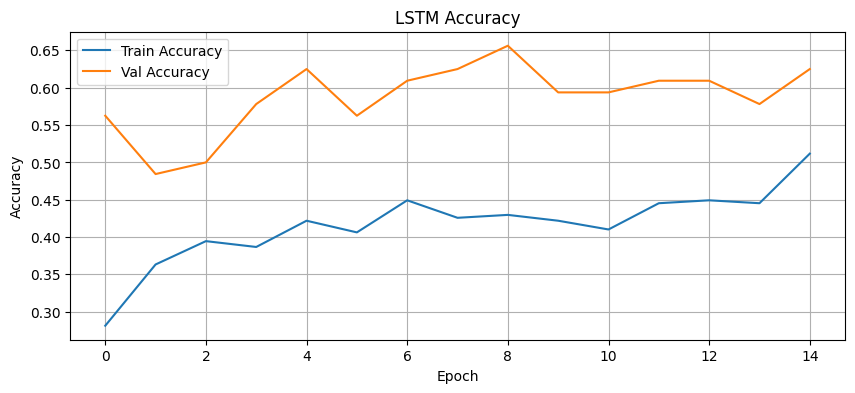

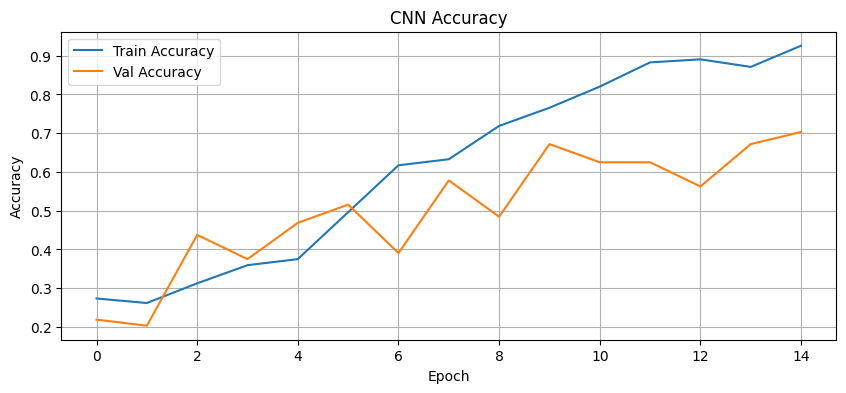

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step

--- LSTM Classification Report ---
              precision    recall  f1-score   support

        Bach       0.91      0.81      0.86        26
   Beethoven       0.15      0.11      0.13        18
      Chopin       0.38      0.44      0.41        18
      Mozart       0.39      0.50      0.44        18

    accuracy                           0.50        80
   macro avg       0.46      0.47      0.46        80
weighted avg       0.51      0.50      0.50        80



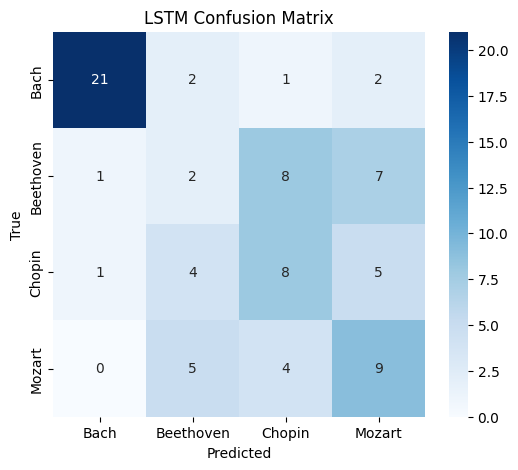

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 211ms/step

--- CNN Classification Report ---
              precision    recall  f1-score   support

        Bach       0.68      0.73      0.70        26
   Beethoven       0.45      0.28      0.34        18
      Chopin       0.45      0.78      0.57        18
      Mozart       0.80      0.44      0.57        18

    accuracy                           0.57        80
   macro avg       0.60      0.56      0.55        80
weighted avg       0.60      0.57      0.56        80



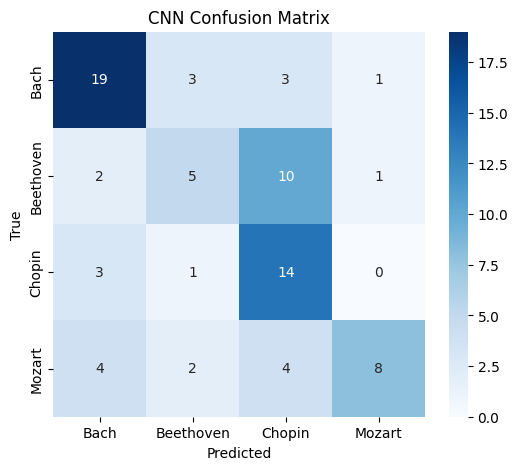

In [4]:
import os
import numpy as np
import pandas as pd
import pretty_midi
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils import resample

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Conv1D, MaxPooling1D, Flatten

# Step 1: Load and balance dataset
def load_midi_paths_and_labels(base_dir, composers):
    file_paths, labels = [], []
    for composer in composers:
        composer_dir = os.path.join(base_dir, composer)
        if not os.path.exists(composer_dir): continue
        for file in os.listdir(composer_dir):
            if file.endswith(".mid") or file.endswith(".midi"):
                file_paths.append(os.path.join(composer_dir, file))
                labels.append(composer)
    return file_paths, labels

def balance_dataset(file_paths, labels, target_count=100):
    df = pd.DataFrame({'path': file_paths, 'label': labels})
    balanced = []
    for composer in df['label'].unique():
        group = df[df['label'] == composer]
        if len(group) > target_count:
            group = group.sample(target_count, random_state=42)
        else:
            group = resample(group, replace=True, n_samples=target_count, random_state=42)
        balanced.append(group)
    df_balanced = pd.concat(balanced)
    return df_balanced['path'].tolist(), df_balanced['label'].tolist()

# Step 2: Feature Extraction
def extract_note_features(midi_path, max_len=500):
    try:
        midi = pretty_midi.PrettyMIDI(midi_path)
        features = []
        for instrument in midi.instruments:
            if instrument.is_drum: continue
            for note in instrument.notes:
                duration = note.end - note.start
                features.append([note.pitch, duration, note.velocity])
        features = features[:max_len] + [[0, 0, 0]] * (max_len - len(features))
        return features
    except:
        return [[0, 0, 0]] * max_len

# Step 3: Prepare data
def prepare_dataset(file_paths, labels, max_len=500):
    X = [extract_note_features(fp, max_len) for fp in file_paths]
    le = LabelEncoder()
    y = le.fit_transform(labels)
    y_cat = to_categorical(y)
    return np.array(X), y_cat, le

# Step 4: Load Data
base_dir = '/kaggle/input/midi-classic-music/midiclassics'
selected_composers = ['Bach', 'Beethoven', 'Chopin', 'Mozart']
file_paths, labels = load_midi_paths_and_labels(base_dir, selected_composers)
file_paths, labels = balance_dataset(file_paths, labels, target_count=100)

print(f"Total files after balancing: {len(file_paths)}")
X, y, le = prepare_dataset(file_paths, labels)
composer_names = le.classes_

# Step 5: Split and reshape
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: LSTM Model
def build_lstm_model(input_shape, num_classes):
    model = Sequential()
    model.add(LSTM(128, input_shape=input_shape))
    model.add(Dropout(0.4))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Step 7: CNN Model
def build_cnn_model(input_shape, num_classes):
    model = Sequential()
    model.add(Conv1D(64, kernel_size=5, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Step 8: Train Models
lstm_model = build_lstm_model((500, 3), 4)
cnn_model = build_cnn_model((500, 3), 4)

history_lstm = lstm_model.fit(X_train, y_train, epochs=15, batch_size=32, validation_split=0.2)
history_cnn = cnn_model.fit(X_train, y_train, epochs=15, batch_size=32, validation_split=0.2)

# Step 9: Evaluate Models
def plot_history(history, title):
    plt.figure(figsize=(10, 4))
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_history(history_lstm, "LSTM Accuracy")
plot_history(history_cnn, "CNN Accuracy")

# Step 10: Report & Confusion Matrix
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = np.argmax(model.predict(X_test), axis=1)
    y_true = np.argmax(y_test, axis=1)
    print(f"\n--- {model_name} Classification Report ---")
    print(classification_report(y_true, y_pred, target_names=composer_names))
    
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=composer_names, yticklabels=composer_names)
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

evaluate_model(lstm_model, X_test, y_test, "LSTM")
evaluate_model(cnn_model, X_test, y_test, "CNN")


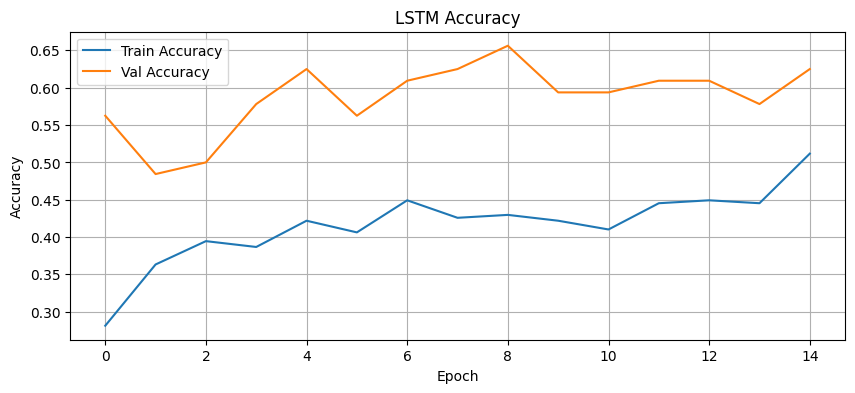

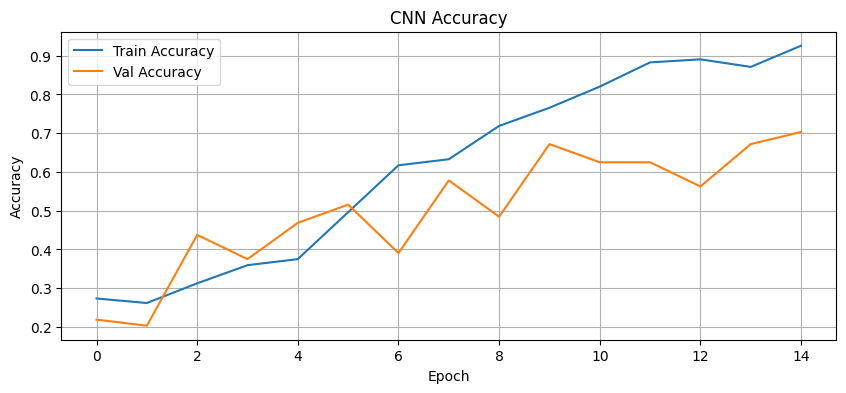

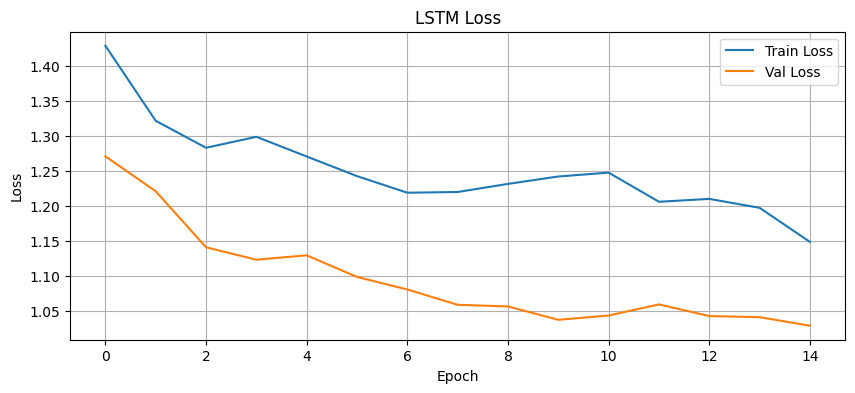

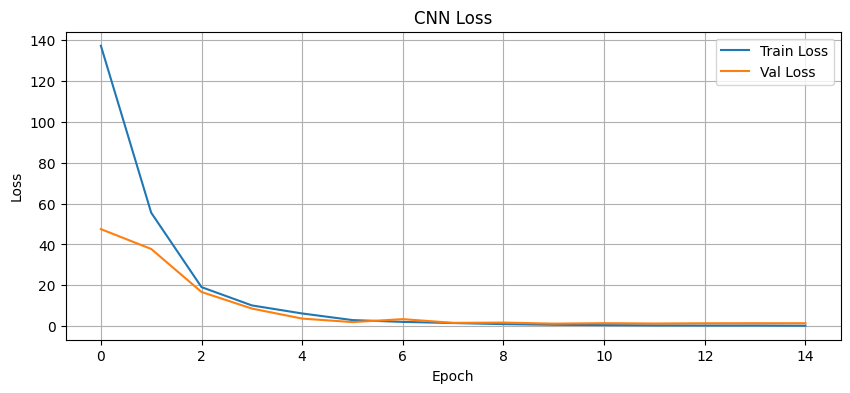

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


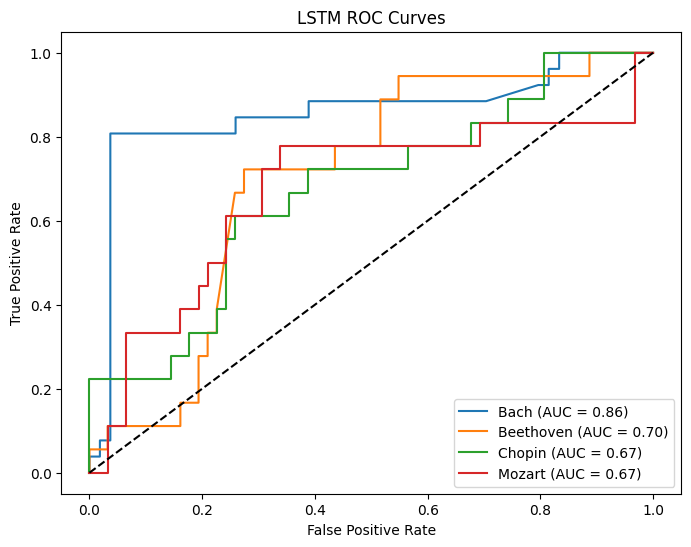

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


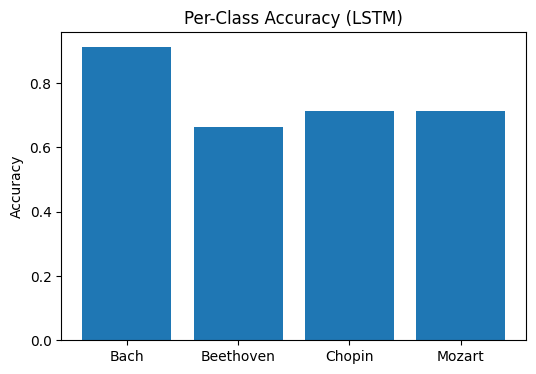

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

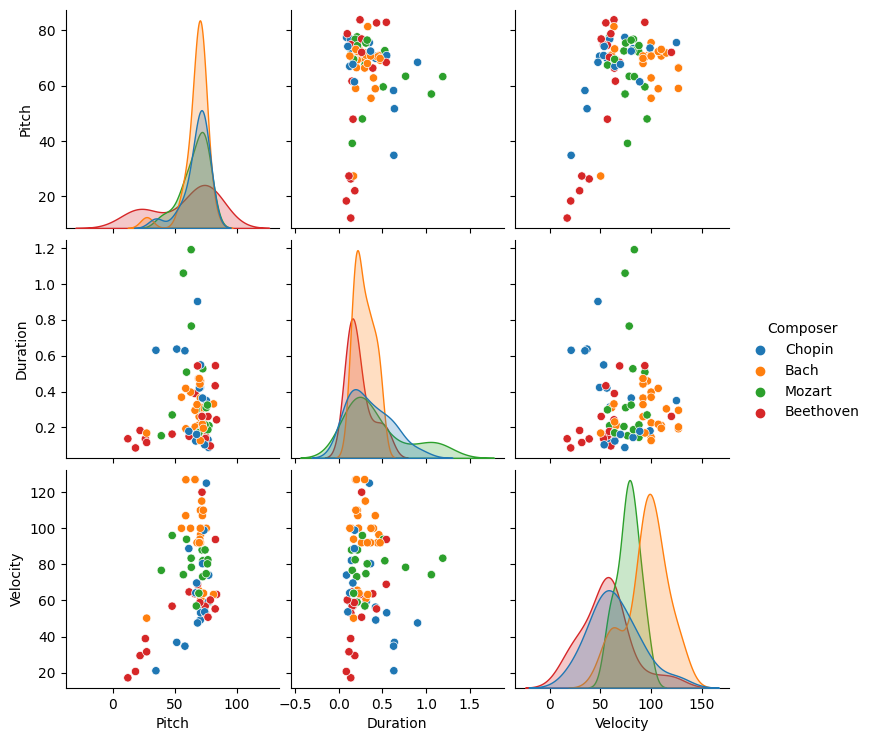

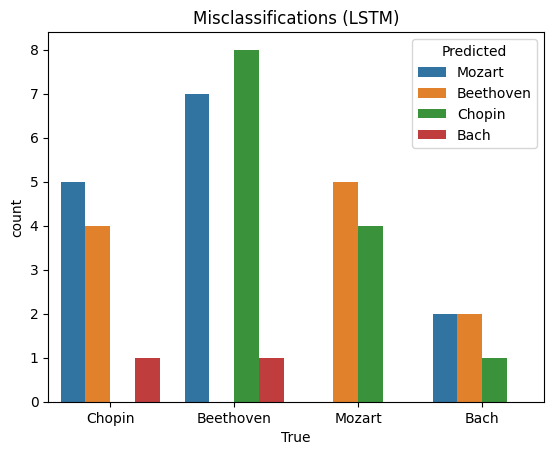

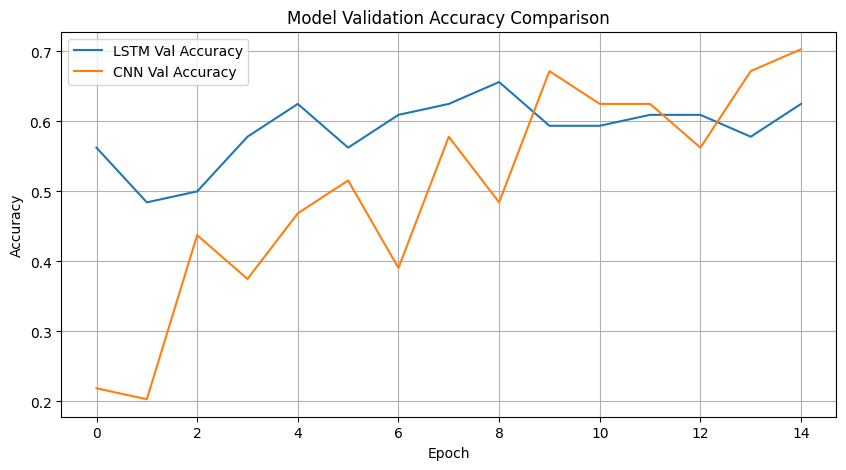

In [5]:
# =========================
# EXTRA PLOTS AFTER TRAINING
# =========================

from sklearn.metrics import roc_curve, auc, accuracy_score
from sklearn.preprocessing import label_binarize

# 1. Accuracy Curves (already have)
def plot_accuracy(history, title):
    plt.figure(figsize=(10, 4))
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_accuracy(history_lstm, "LSTM Accuracy")
plot_accuracy(history_cnn, "CNN Accuracy")

# 2. Loss Curves
def plot_loss(history, title):
    plt.figure(figsize=(10, 4))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_loss(history_lstm, "LSTM Loss")
plot_loss(history_cnn, "CNN Loss")

# 3. ROC Curves & AUC for LSTM
y_test_bin = label_binarize(np.argmax(y_test, axis=1), classes=list(range(len(composer_names))))
y_pred_prob_lstm = lstm_model.predict(X_test)

plt.figure(figsize=(8, 6))
for i, composer in enumerate(composer_names):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_prob_lstm[:, i])
    plt.plot(fpr, tpr, label=f'{composer} (AUC = {auc(fpr, tpr):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('LSTM ROC Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# 4. Per-Class Accuracy (LSTM)
y_true = np.argmax(y_test, axis=1)
y_pred_lstm = np.argmax(lstm_model.predict(X_test), axis=1)

acc_per_class = [accuracy_score(y_true == i, y_pred_lstm == i) for i in range(len(composer_names))]
plt.figure(figsize=(6, 4))
plt.bar(composer_names, acc_per_class)
plt.title("Per-Class Accuracy (LSTM)")
plt.ylabel("Accuracy")
plt.show()

# 5. Feature Distribution Heatmap (averaged per song)
df_features = pd.DataFrame(X_test.reshape(X_test.shape[0], -1, 3).mean(axis=1), columns=['Pitch', 'Duration', 'Velocity'])
df_features['Composer'] = [composer_names[i] for i in y_true]
sns.pairplot(df_features, hue='Composer')
plt.show()

# 6. Misclassifications (LSTM)
misclass_df = pd.DataFrame({
    'True': [composer_names[i] for i in y_true],
    'Predicted': [composer_names[i] for i in y_pred_lstm]
})
sns.countplot(data=misclass_df[misclass_df['True'] != misclass_df['Predicted']], x='True', hue='Predicted')
plt.title("Misclassifications (LSTM)")
plt.show()

# 7. Side-by-Side Model Comparison
plt.figure(figsize=(10, 5))
plt.plot(history_lstm.history['val_accuracy'], label='LSTM Val Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='CNN Val Accuracy')
plt.title('Model Validation Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
#-------------------------- Experimental bonus: Balancing accuracy and speed -  1 accuracy

In [1]:
import os
import numpy as np
from music21 import converter, note, chord
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import pickle
import warnings
warnings.filterwarnings('ignore')

# Define composers
SELECTED_COMPOSERS = ['Bach', 'Beethoven', 'Chopin', 'Mozart']

# Load and preprocess dataset (limit to 100 files for speed)
dataset_path = '/kaggle/input/midi-classic-music/midiclassics'
note_sequences = []
labels = []
file_count = 0
max_files = 100  # Limit for faster processing

for root, _, files in os.walk(dataset_path):
    for file in files:
        if file_count >= max_files:
            break
        if file.endswith('.mid') or file.endswith('.MID'):
            composer = None
            for comp in SELECTED_COMPOSERS:
                if comp.lower() in root.lower():
                    composer = comp
                    break
            if composer:
                file_path = os.path.join(root, file)
                try:
                    midi = converter.parse(file_path)
                    notes = []
                    for element in midi.flat:
                        if isinstance(element, note.Note):
                            notes.append(str(element.pitch))
                        elif isinstance(element, chord.Chord):
                            notes.append('.'.join(str(n) for n in element.normalOrder))
                    if notes:
                        seq_length = 50  # Reduced sequence length
                        for i in range(0, len(notes) - seq_length, 2):  # Step by 2 to reduce sequences
                            note_sequences.append(notes[i:i + seq_length])
                            labels.append(composer)
                    file_count += 1
                except:
                    continue
    if file_count >= max_files:
        break

if not note_sequences:
    print("No valid sequences found. Exiting.")
    exit()

# Prepare data
unique_notes = sorted(set(note for seq in note_sequences for note in seq))
note_to_int = {note: number for number, note in enumerate(unique_notes)}

X = [[note_to_int[note] for note in seq] for seq in note_sequences]
X = np.array(X).reshape(len(X), 50, 1)  # Fixed shape for seq_length=50

le = LabelEncoder()
y = le.fit_transform(labels)
y = to_categorical(y, num_classes=len(SELECTED_COMPOSERS))

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build simplified model
model = Sequential([
    Conv1D(32, 3, activation='relu', input_shape=(50, 1)),  # Reduced filters
    MaxPooling1D(2),
    Dropout(0.2),
    LSTM(64),  # Single LSTM layer with fewer units
    Dropout(0.2),
    Dense(32, activation='relu'),  # Reduced dense units
    Dense(len(SELECTED_COMPOSERS), activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001),
             loss='categorical_crossentropy',
             metrics=['accuracy'])

# Train model with fewer epochs and larger batch size
print("Training model...")
model.fit(X_train, y_train,
          validation_data=(X_test, y_test),
          epochs=20,  # Reduced epochs
          batch_size=64,  # Increased batch size
          verbose=1)

# Evaluate model
print("Evaluating model...")
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Save model and label encoder
model.save('composer_classification_model.h5')
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(le, f)

2025-08-07 03:04:00.488508: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1754535840.745194      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1754535840.821583      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-08-07 03:10:00.935336: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Training model...
Epoch 1/20
1491/1491 ━━━━━━━━━━━━━━━━━━━━ 35s 20ms/step - accuracy: 0.9805 - loss: 0.0763 - val_accuracy: 1.0000 - val_loss: 1.8285e-06
Epoch 2/20
1491/1491 ━━━━━━━━━━━━━━━━━━━━ 30s 20ms/step - accuracy: 1.0000 - loss: 3.4256e-06 - val_accuracy: 1.0000 - val_loss: 2.9772e-07
Epoch 3/20
1491/1491 ━━━━━━━━━━━━━━━━━━━━ 30s 20ms/step - accuracy: 1.0000 - loss: 9.9111e-07 - val_accuracy: 1.0000 - val_loss: 5.1236e-08
Epoch 4/20
1491/1491 ━━━━━━━━━━━━━━━━━━━━ 30s 20ms/step - accuracy: 1.0000 - loss: 3.9765e-07 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/20
1491/1491 ━━━━━━━━━━━━━━━━━━━━ 30s 20ms/step - accuracy: 1.0000 - loss: 1.8505e-07 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/20
1491/1491 ━━━━━━━━━━━━━━━━━━━━ 30s 20ms/step - accuracy: 1.0000 - loss: 1.2999e-07 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/20
1491/1491 ━━━━━━━━━━━━━━━━━━━━ 30s 20ms/step - accuracy: 1.0000 - loss: 3.8396e-08 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 

In [ ]:
#------------------ end of docuemnt ------------------------------